In [3]:
#Vintage Function

# import csv

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv(input('paste file adress')) #/Users/dus/Desktop/Python/airport_taxi.csv

paste file adress/Users/dus/Desktop/Python/airport_taxi.csv


# выбор колонок начала, завершения анализа и признака разбиения

In [18]:
date_start = str(input('enter start date column: '))     # time_came
date_finish = str(input('enter finish date column: '))   # time_left
segment_tag = str(input('enter tag column: '))           # id_port


enter start date column: time_came
enter finish date column: time_left
enter tag column: id_port


In [21]:
def vintage_function(date_start, date_finish, segment_tag):
    # data import
    df = pd.read_csv('/Users/dus/Desktop/Python/airport_taxi.csv')
    
    # picking columns of interest (function variables)
    date_start = 'time_came'  # time_came
    date_finish = 'time_left'   # time_left
    segment_tag = 'id_port'        # id_port
    
    dfs=df
    
    
    #date_start and date_left to time type
    dfs[date_start] = pd.to_datetime(dfs[date_start])
    dfs[date_finish] = pd.to_datetime(dfs[date_finish])     
    
    #difference between time_left and time_came
    time_diff = dfs[date_finish]-dfs[date_start]             
    
    # longest 'dying' period
    max_time_diff = max(time_diff)                         
    
    # possible amount of logs
    h = 24    
    
    # length of one log
    length = max_time_diff/h
    
    # created dataframes and lists
    num_column = []
    df_agg = pd.DataFrame()

    # cycle for creating columns with grouped count
    for i in range (0,h+1):
        
        str_num = str(length*i)
       
        num = 'flag_' + str_num
       
        
        dfs[num] = (dfs[date_start] + pd.Timedelta(length*i) < dfs[date_finish]).astype(int)
       
        num_column.append(num)
        
        
        #sum of drives grouped by airports
        dt = dfs.groupby(segment_tag).agg({num:'sum'
                                          })
        df_agg[num] = dt[num]
    
    
   
    # cycle for creating columns with conversion
    for col in num_column:
        conv = col + '_conv'
        df_agg[conv] = df_agg[col]/df_agg['flag_0 days 00:00:00']


    # plotting of vintages
    df_agg.iloc[:,25:37].T.plot(figsize = (8,5))
    plt.xticks(rotation = 45)
 
    return df_agg
 
        
  

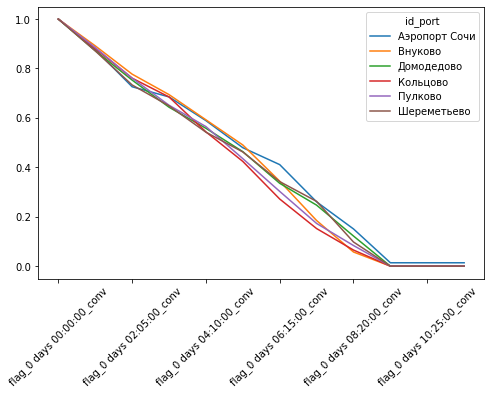

In [22]:
  df_new = vintage_function(date_start, date_finish, segment_tag)

In [ ]:
df_new.iloc[:,25:35]